In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('shop.xlsx')

In [3]:
df.head()

,age,income,sscore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
df.describe()

,age,income,sscore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     200 non-null    int64
 1   income  200 non-null    int64
 2   sscore  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [6]:
from sklearn.cluster import KMeans

In [7]:
my_cluster_model = KMeans(n_clusters=2)

In [8]:
my_cluster_model.fit(df)

KMeans(n_clusters=2)

In [9]:
df['cluster'] = my_cluster_model.labels_

In [10]:
df

,age,income,sscore,cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,1
198,32,137,18,1


In [11]:
my_cluster_model.cluster_centers_

array([[39.21232877, 49.18493151, 55.16438356],
       [37.87037037, 91.31481481, 36.77777778]])

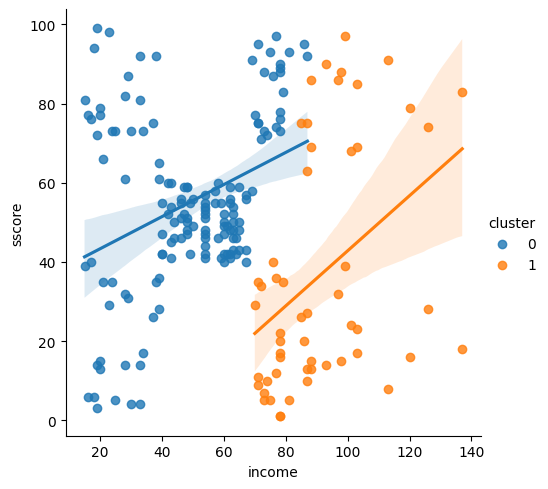

In [12]:
sns.lmplot(x='income',y='sscore',data=df, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

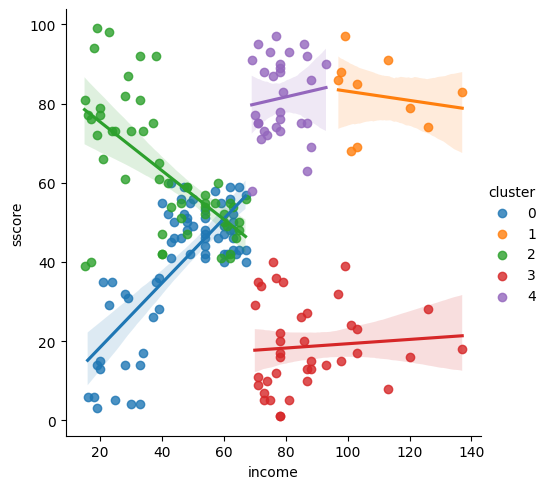

In [13]:
my_cluster_model = KMeans(n_clusters=5)
my_cluster_model.fit(df)
df['cluster'] = my_cluster_model.labels_
sns.lmplot(x='income',y='sscore',data=df, hue='cluster');  #seaborn.lmplot() method is used to draw a scatter plot.
plt.show()

In [14]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

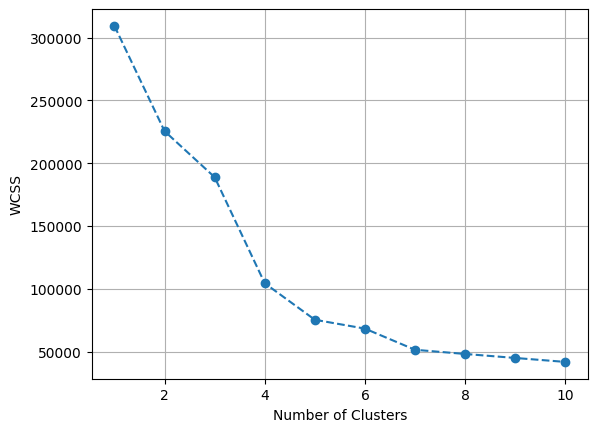

In [15]:
plt.plot(range(1,11),wcss,"o--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()